In [64]:
import os
import scipy.io
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pickle

#CNN
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout, LSTM


In [65]:
def load_array_from_pkl(filename):
    with open(filename, 'rb') as f:
        array = pickle.load(f)
    print(f"Array loaded from {filename}")
    return array

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split

label = load_array_from_pkl("K_B2956_T385_C16_LABELS.pkl")
data = load_array_from_pkl("K_B2956_T385_C16_TRAIN.pkl")
# Dividir los datos en conjuntos de entrenamiento y prueba
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    data, label, test_size=0.2)

Array loaded from K_B2956_T385_C16_LABELS.pkl
Array loaded from K_B2956_T385_C16_TRAIN.pkl


In [67]:
#Long Short-Term Memory (LSTM)
#tres componentes principales: un estado de celda, una puerta de entrada, una puerta de salida y una puerta de olvido.
#estado de celda: agregación de datos de todos los pasos de tiempo anteriores que se han procesado
#puerta de entrada: extracción de caracteristicas significativas para ser recordados
#puerta del olvido: decide que información mantener o descartar de la celda de memoria 1 mantener - 0 olvidar

In [68]:
label

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [69]:
def plot_training_historyss(history_ss):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot training & validation accuracy and loss values from history and history_s
    ax1.plot(history_ss.history['accuracy'], label='Train Accuracy (Shuffle)', color='blue')
    ax1.plot(history_ss.history['val_accuracy'], label='Val Accuracy (Shuffle)', color='orange')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='lower right')


    ax2.plot(history_ss.history['loss'], label='Train Loss (Shuffle)', color='red')
    ax2.plot(history_ss.history['val_loss'], label='Val Loss (Shuffle)', color='orange')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')
    

    # Show the plot
    plt.tight_layout()
    plt.show()

LSTM MODEL

In [70]:
# Parámetros del modelo
input_shape=(385,16)
optimizer_params = {
    'learning_rate': 0.0001,    'beta_1': 0.9,    'beta_2': 0.999,    'epsilon': 1e-07,
    'amsgrad': False,    'weight_decay': None,    'clipnorm': None,    'clipvalue': None,
    'global_clipnorm': None,
    'use_ema': False,
    'ema_momentum': 0.99,
    'ema_overwrite_frequency': None,
    'loss_scale_factor': None,
    'gradient_accumulation_steps': None,
    'name': "adam"
}

In [71]:

modelo = Sequential()
modelo.add(LSTM(16, input_shape=input_shape))
modelo.add(Dense(6, activation='softmax'))
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelo.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,214 (8.65 KB)

 Trainable params: 2,214 (8.65 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history_lstm = modelo.fit(train_inputs, train_labels, epochs=50, batch_size=32,shuffle=True, validation_data=(val_inputs, val_labels))


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.2190 - loss: 1.7756 - val_accuracy: 0.2872 - val_loss: 1.7183
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.3027 - loss: 1.6899 - val_accuracy: 0.3176 - val_loss: 1.6727
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3334 - loss: 1.6428 - val_accuracy: 0.3378 - val_loss: 1.6376
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.3561 - loss: 1.6131 - val_accuracy: 0.3632 - val_loss: 1.5963
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.3822 - loss: 1.5733 - val_accuracy: 0.3784 - val_loss: 1.5759
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4009 - loss: 1.5191 - val_accuracy: 0.3936 - val_loss: 1.5515
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4344 - loss: 1.4544 - val_accuracy: 0.4071 - val_loss: 1.5371
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4192 - loss: 1.4647 - val_accuracy: 0.4105 - 

In [73]:
#rendimiento del modelo con shuffle 
print("Rendimiento del modelo con shuffle")
test_loss, test_accuracy = modelo.evaluate(val_inputs, val_labels) 
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

Rendimiento del modelo con shuffle
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5660 - loss: 1.2425
Test accuracy: 0.5304054021835327
Test loss: 1.3013896942138672


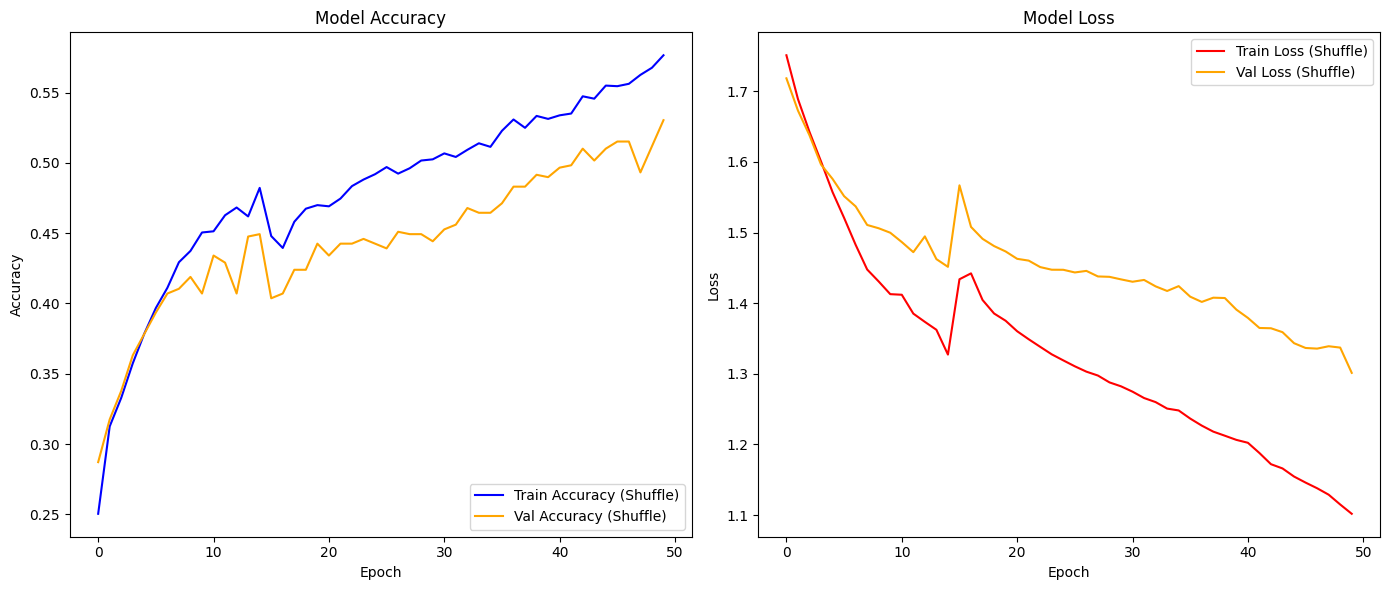

In [74]:
plot_training_historyss(history_lstm)

In [ ]:
#return_sequences=True para obtener secuencias en lugar de solo la última salida, devolver secuencias

In [79]:
from tensorflow.keras.optimizers import Adam

modelo_l1 = Sequential()

modelo_l1.add(LSTM(16, activation='relu', input_shape=input_shape, return_sequences=True))

modelo_l1.add(LSTM(8, activation='relu'))

modelo_l1.add(Dropout(0.4))

modelo_l1.add(Dense(6, activation='softmax'))

modelo_l1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


modelo_l1.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 385, 16)        │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,966 (11.59 KB)

 Trainable params: 2,966 (11.59 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history_lstm1 = modelo_l1.fit(train_inputs, train_labels, epochs=20, batch_size=32,shuffle=True, validation_data=(val_inputs, val_labels))

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.1737 - loss: 1.7856 - val_accuracy: 0.2264 - val_loss: 1.7717
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 258ms/step - accuracy: 0.2115 - loss: 1.7622 - val_accuracy: 0.2618 - val_loss: 1.7376
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.2271 - loss: 1.7449 - val_accuracy: 0.2432 - val_loss: 1.7296
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.2604 - loss: 1.7463 - val_accuracy: 0.2551 - val_loss: 1.7458
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.2218 - loss: 1.7362 - val_accuracy: 0.2720 - val_loss: 1.7234
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.2600 - loss: 1.7116 - val_accuracy: 0.2787 - val_loss: 1.7088
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.2540 - loss: 1.6899 - val_accuracy: 0.2736 - val_loss: 1.7045
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 23s 314ms/step - accuracy: 0.2644 - loss: 1.7020 - val_accuracy

In [81]:
#rendimiento del modelo con shuffle 
print("Rendimiento del modelo con shuffle")
test_loss, test_accuracy = modelo_l1.evaluate(val_inputs, val_labels) 
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

Rendimiento del modelo con shuffle
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3338 - loss: 1.6211
Test accuracy: 0.34121620655059814
Test loss: 1.622646689414978


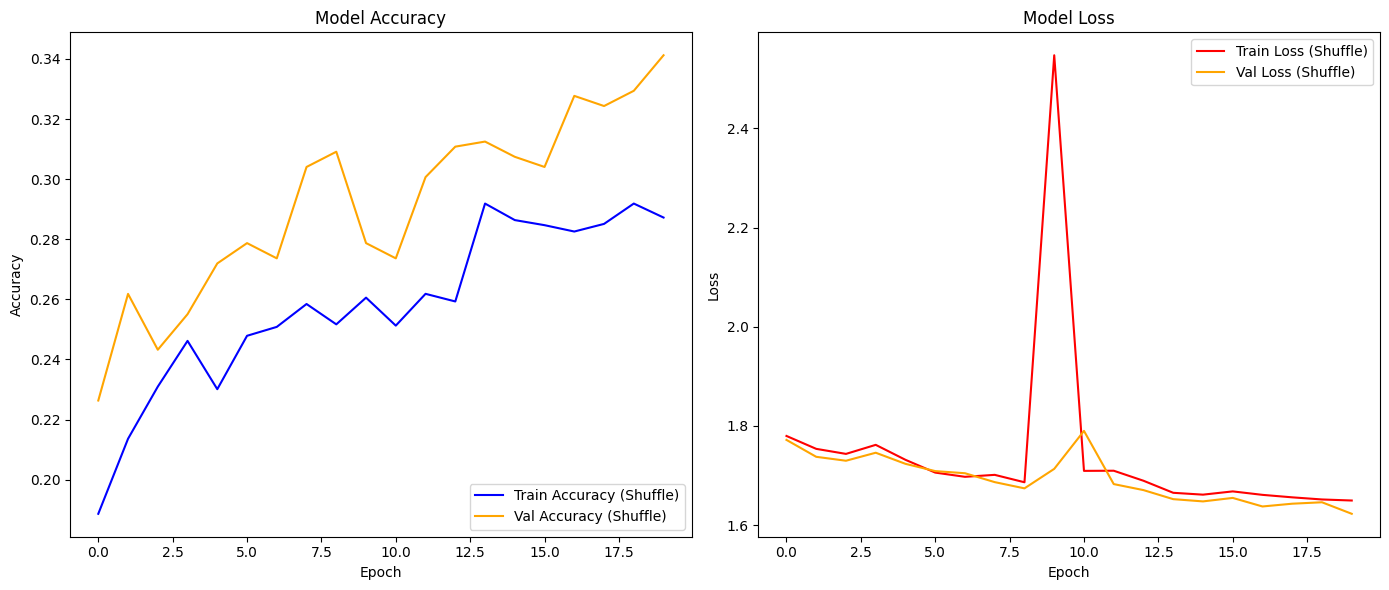

In [82]:
plot_training_historyss(history_lstm1)